In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lds import LDS

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

A 2D surface parallel to earth. Noisy observations are positions $x_{x}$, $x_{y}$. Hidden variables are true position values and velocities $v_{x}$, $v_{y}$. We assume constant velocity for this example.

$x_{x}(t+1) = x_{x}(t) + v_{x}(t) + \eta_{x_{x}}(t)$

$v_{x}(t+1)$ = $v_{x}(t) + \eta_{v_x}(t)$

$x_{y}(t+1) = x_{y}(t) + v_{y}(t) + \eta_{x_{y}}(t)$

$v_{y}(t+1)$ = $v_{y}(t) + \eta_{v_y}(t)$

In [2]:
A = np.array([[1,1,0,0],[0,1,0,0],[0,0,1,1],[0,0,0,1]])
B = np.array([[1,0,0,0],[0,0,1,0]])
pi_m = np.array([0,0.8,0,-0.3])
S = 4
O = 2
pi_s = np.eye(S)
E_h = np.eye(S)*0.2
E_o = np.eye(O)*0.2

In [3]:
lds = LDS(A,B,pi_m,pi_s,S,O,E_h,E_o)

In [4]:
states,observations = lds.generate_data(10)

In [5]:
print states

[array([-0.6517628 ,  0.89166822, -0.42792272,  1.45653991]), array([0.79287471, 1.79161165, 1.43959432, 2.14807381]), array([2.96812606, 0.88246992, 3.09171059, 2.76257683]), array([3.79118636, 1.43627714, 5.826368  , 2.82579843]), array([3.98846183, 1.43844794, 8.1862897 , 2.84033734]), array([ 4.87682604,  1.57829541, 10.94683951,  3.12731879]), array([ 6.70131015,  2.19026226, 13.82168401,  3.20639156]), array([ 8.83273329,  2.19626455, 16.85626941,  2.83009248]), array([11.57836645,  2.4421158 , 19.13594633,  2.61528413]), array([13.84187   ,  2.44411176, 22.3127164 ,  2.46739049])]


In [6]:
print observations

[array([-1.55059875, -0.2550514 ]), array([1.07627253, 1.59995631]), array([2.78421558, 3.41405942]), array([4.39460806, 6.08059767]), array([3.9021583 , 9.00711329]), array([ 4.57010614, 11.46066153]), array([ 6.7595347 , 14.58821754]), array([ 9.099652  , 16.56385658]), array([11.58709064, 19.29855779]), array([13.01962436, 22.13499598])]


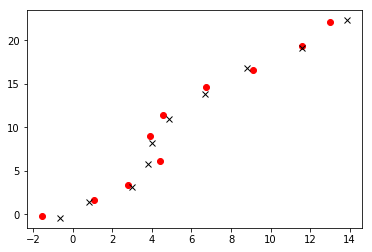

In [7]:
for obs, state in zip(observations, states):
    plt.plot(obs[0],obs[1],'ro')
    plt.plot(state[0],state[2],'kx')
plt.show()

In [8]:
f,F = lds.filtering(observations)

In [9]:
print f

[array([[-0.77529935],
       [ 0.        ],
       [-0.1275257 ],
       [ 0.        ]]), array([[0.54725197],
       [0.52902053],
       [1.10639001],
       [0.49356628]]), array([[2.44262696],
       [1.21219775],
       [3.05123878],
       [1.21920752]]), array([[4.26045045],
       [1.52267677],
       [5.75233187],
       [1.97890835]]), array([[4.23798347],
       [0.72922458],
       [8.77932095],
       [2.51711197]]), array([[ 4.64087224],
       [ 0.56163788],
       [11.43139494],
       [ 2.58642044]]), array([[ 6.48212667],
       [ 1.21880131],
       [14.48659157],
       [ 2.82716644]]), array([[ 8.85045988],
       [ 1.8091715 ],
       [16.69745658],
       [ 2.51064979]]), array([[11.42185979],
       [ 2.20063494],
       [19.28244348],
       [ 2.54882767]]), array([[13.12702796],
       [ 1.94617402],
       [22.08088627],
       [ 2.67702455]])]


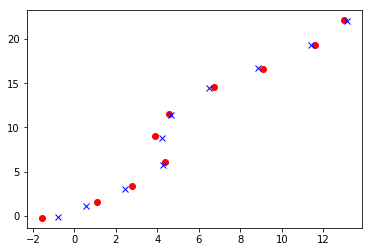

In [10]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(f[i][0],f[i][2],'bx')
plt.show()

In [11]:
h,H = lds.smoothing(observations)

In [12]:
print h

[array([[-0.49801604],
       [ 0.87103273],
       [ 0.04455193],
       [ 1.07139772]]), array([[0.92758334],
       [1.18749886],
       [1.46010491],
       [1.79864023]]), array([[2.52095967],
       [1.09808753],
       [3.463049  ],
       [2.32157891]]), array([[3.76166876],
       [0.86605463],
       [6.03792133],
       [2.59122417]]), array([[4.13740566],
       [1.12433945],
       [8.83976259],
       [2.65025234]]), array([[ 5.00667473],
       [ 1.63769466],
       [11.53328134],
       [ 2.66601411]]), array([[ 6.82586761],
       [ 1.96955169],
       [14.31518168],
       [ 2.56588966]]), array([[ 9.0432504 ],
       [ 2.05357761],
       [16.7239217 ],
       [ 2.62291484]]), array([[11.28825753],
       [ 1.94617402],
       [19.34975202],
       [ 2.67702454]]), array([[13.12702796],
       [ 1.94617402],
       [22.08088627],
       [ 2.67702455]])]


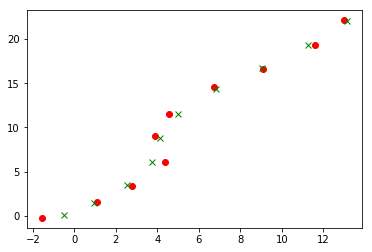

In [13]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(h[i][0],h[i][2],'gx')
plt.show()

In [14]:
A, B, pi_m, pi_s, E_h, E_o, h_list, H_list = lds.EM(observations,estimate=['A','B','pi_m','pi_s'],num_iterations=100)

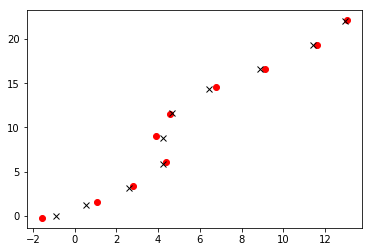

In [15]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(h_list[i][0],h_list[i][2],'kx')
plt.show()

In [16]:
A

array([[-0.10163714,  1.44169057,  0.60448743, -0.28445375],
       [-0.64076684,  1.21413419,  0.36423205, -0.22291894],
       [-0.27808856,  1.1457207 ,  1.05335391,  0.9234373 ],
       [ 0.11146348,  0.6274399 , -0.09253864,  0.91754798]])